In [172]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
from sklearn.preprocessing import StandardScaler  # Feature scaling
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

# Importing modules for machine learning from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Importing evaluation metrics
from sklearn.metrics import classification_report,f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.preprocessing import LabelEncoder
import shap
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [173]:
# Import Data
loan_df = pd.read_excel('/Users/seyi/Documents/Coursework/RAPH PROJECT/Loan Default Prediction Dataset - NIKHIL.xlsx')

In [174]:
#preview dataset
loan_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [175]:
loan_df=loan_df.drop('LoanID', axis = 1)

In [176]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [177]:
#preview dataset
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [178]:
sns.set_palette("Set1")

In [179]:
loan_df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

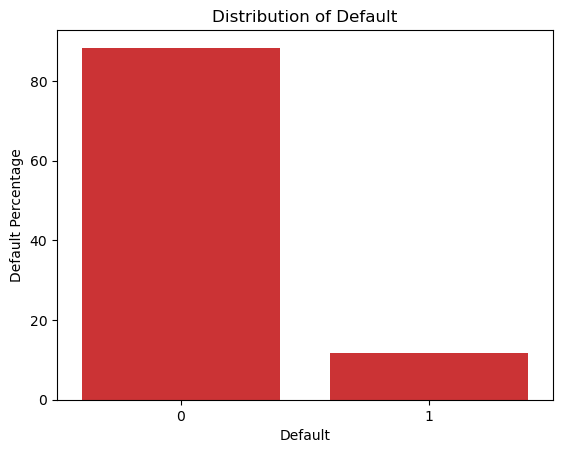

In [180]:
sns.barplot(loan_df['Default'].value_counts() /
            loan_df['Default'].count()*100)
plt.title('Distribution of Default')
plt.ylabel('Default Percentage')
plt.show()

In [181]:
#Over 80% did not default and less than 20% of the applicants defaulted

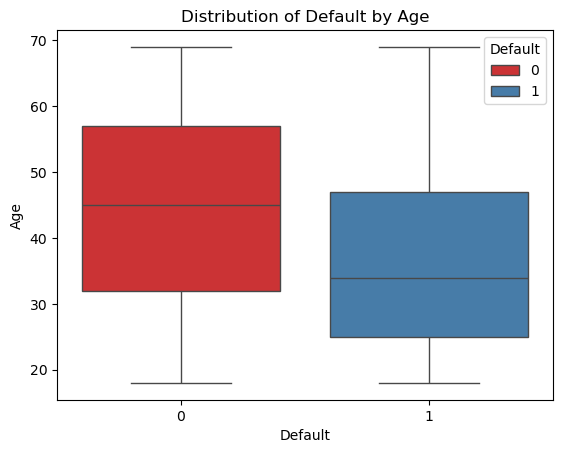

In [182]:
sns.boxplot(data=loan_df, y='Age',x='Default', hue='Default')
plt.title('Distribution of Default by Age')
plt.show()

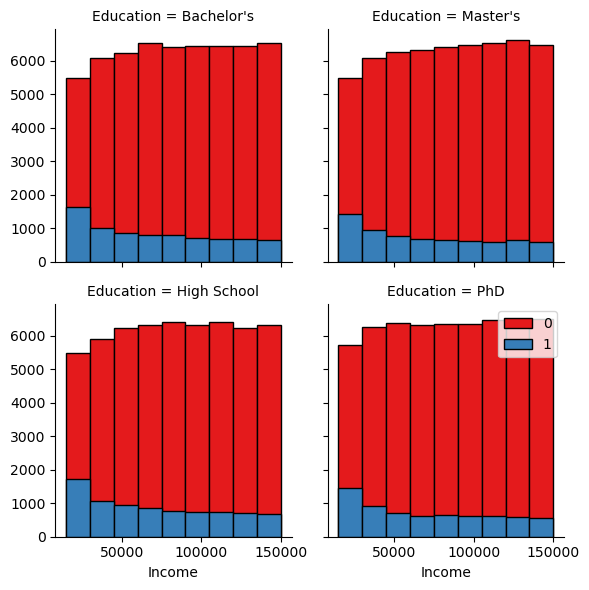

In [183]:
bins = np.linspace(loan_df.Income.min(), loan_df.Income.max(), 10)
g = sns.FacetGrid(loan_df, col="Education", hue="Default",
                  palette="Set1", col_wrap=2)
g.map(plt.hist, 'Income', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [184]:
loan_df.groupby('Default')['Education'].value_counts()

Default  Education  
0        PhD            56811
         Master's       56633
         Bachelor's     56577
         High School    55673
1        High School     8230
         Bachelor's      7789
         Master's        6908
         PhD             6726
Name: count, dtype: int64

In [185]:
loan_df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

Text(0.5, 1.0, 'Education')

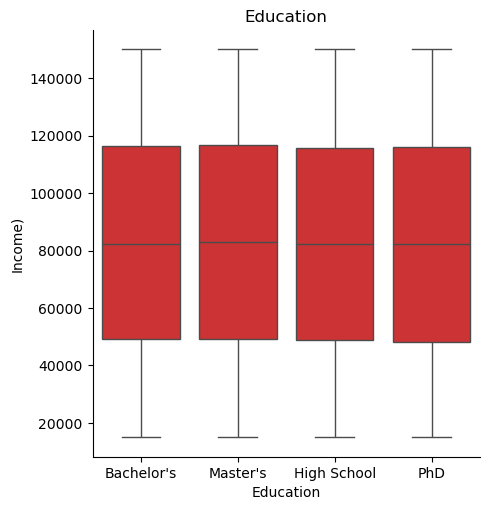

In [186]:
sns.catplot(data=loan_df,
            x='Education', y='Income', kind="box")
plt.ylabel("Income)")
plt.title('Education')

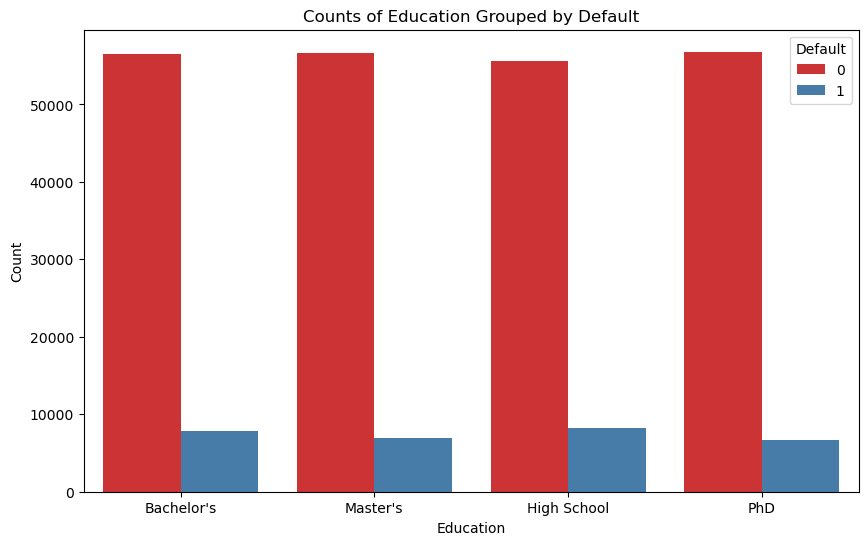

In [187]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='Education', hue='Default')
plt.title('Counts of Education Grouped by Default')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

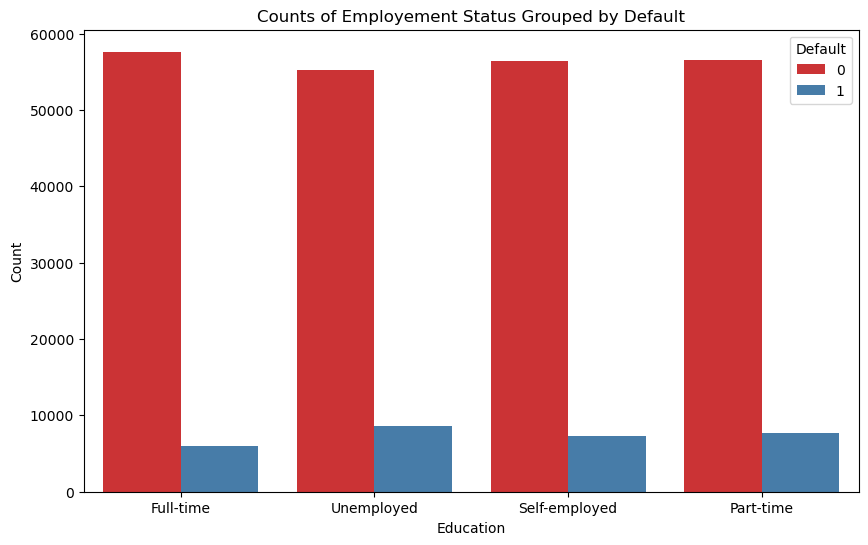

In [188]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='EmploymentType', hue='Default')
plt.title('Counts of Employement Status Grouped by Default')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

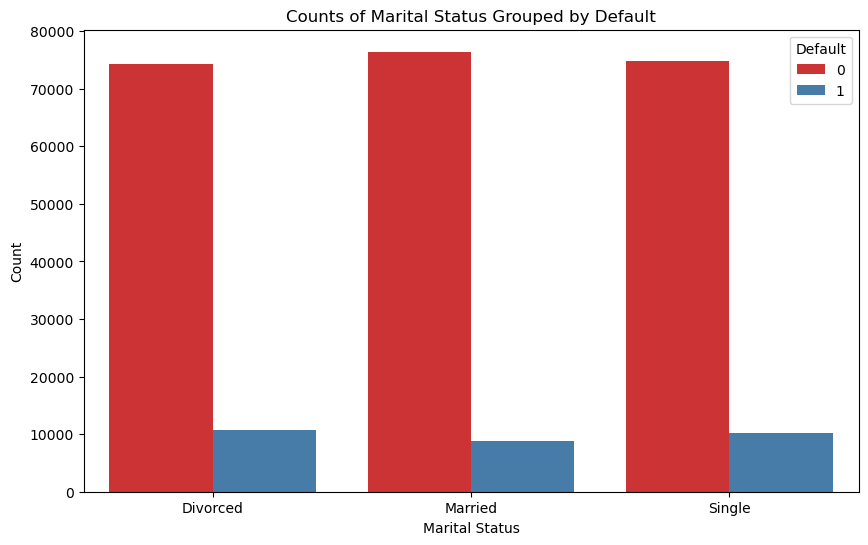

In [189]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='MaritalStatus', hue='Default')
plt.title('Counts of Marital Status Grouped by Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

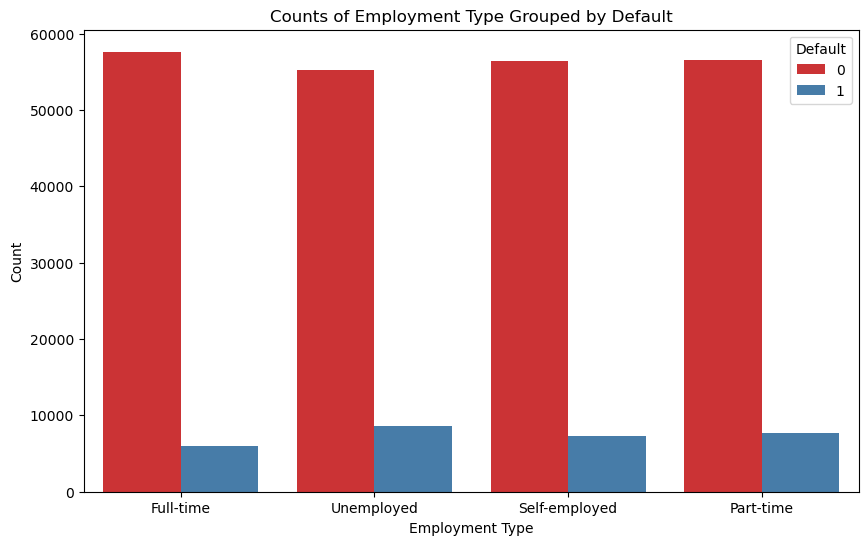

In [190]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='EmploymentType', hue='Default')
plt.title('Counts of Employment Type Grouped by Default')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

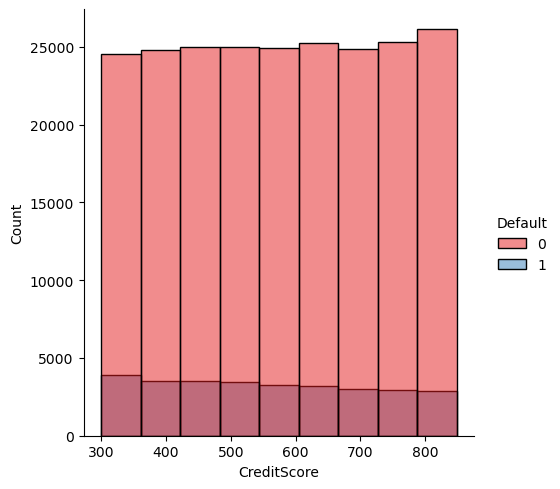

In [191]:
bins = np.linspace(loan_df.CreditScore.min(), loan_df.CreditScore.max(), 10)
sns.displot(loan_df, x='CreditScore',bins=bins, hue='Default')

In [192]:
#Pre process
#Check for missing values
loan_df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [193]:
loan_df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [194]:
loan_df.duplicated().sum()

0

In [195]:
#Data Preprocessing
#Define a mapping for 'yes' and 'no' to binary values
binary_map = {'Yes': 1, 'No': 0}
#Apply mapping to convert 'yes' and 'no' to binary values
loan_df['HasMortgage'] = loan_df['HasMortgage'].map(binary_map)
loan_df['HasDependents'] = loan_df['HasDependents'].map(binary_map)
loan_df['HasCoSigner'] = loan_df['HasCoSigner'].map(binary_map)
loan_df.head()		

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [196]:
#One hot encoding for non numeric columns
non_numeric_columns = loan_df.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], dtype='object')

In [197]:
loan_df_encoded = pd.get_dummies(loan_df, columns=non_numeric_columns)
# Convert boolean columns to integer (0 or 1)
loan_df_encoded = loan_df_encoded.astype(int)
loan_df_encoded.drop(
    columns=['Education_PhD', 'EmploymentType_Full-time', 'LoanPurpose_Other'], axis=1, inplace=True)
loan_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Age                           255347 non-null  int64
 1   Income                        255347 non-null  int64
 2   LoanAmount                    255347 non-null  int64
 3   CreditScore                   255347 non-null  int64
 4   MonthsEmployed                255347 non-null  int64
 5   NumCreditLines                255347 non-null  int64
 6   InterestRate                  255347 non-null  int64
 7   LoanTerm                      255347 non-null  int64
 8   DTIRatio                      255347 non-null  int64
 9   HasMortgage                   255347 non-null  int64
 10  HasDependents                 255347 non-null  int64
 11  HasCoSigner                   255347 non-null  int64
 12  Default                       255347 non-null  int64
 13  Education_Bach

Text(0.5, 1.0, 'Correlation Between Features and Target')

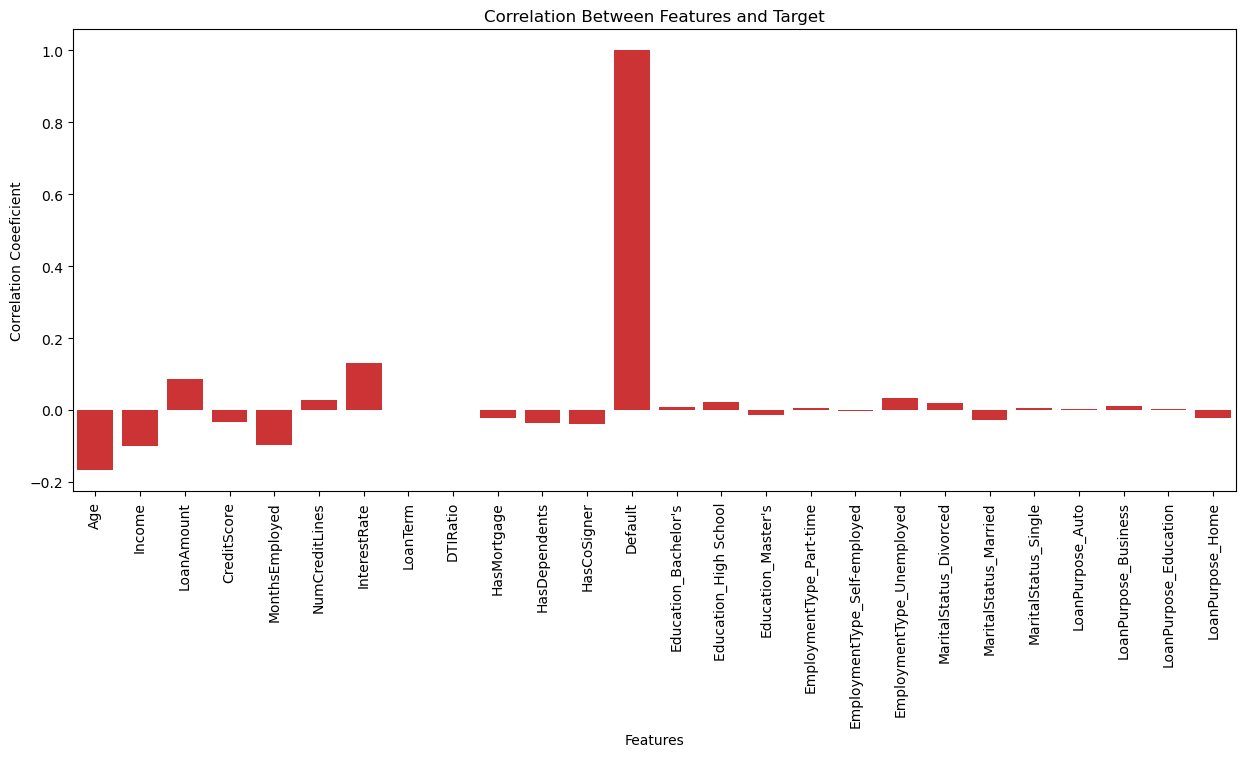

In [198]:
plt.figure(figsize=(15, 6))
sns.barplot(loan_df_encoded.corr()['Default'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation Coeeficient")
plt.title("Correlation Between Features and Target")

In [199]:
#The relationships between the variables and the default appear top be non linear.
#We would use all features for the first experiment

In [200]:
#Select Target and Features
y= loan_df_encoded.Default
X = loan_df_encoded.drop(columns=['Default'])
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (255347, 25)
y shape: (255347,)


In [201]:
#normalize data
X = StandardScaler().fit(X).transform(X)
X[0:1]

array([[ 8.33989509e-01,  8.96928115e-02, -1.08683299e+00,
        -3.41492335e-01,  5.90533211e-01,  1.34193677e+00,
         3.02085174e-01, -1.52594275e-03,  0.00000000e+00,
         9.99972587e-01,  9.99463619e-01,  9.99784630e-01,
         1.72253011e+00, -5.77749720e-01, -5.75567057e-01,
        -5.79305322e-01, -5.76561919e-01, -5.77273394e-01,
         1.41524433e+00, -7.08268087e-01, -7.06460964e-01,
        -4.98620366e-01, -5.01398443e-01, -4.99605897e-01,
        -5.01325053e-01]])

In [202]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (204277, 25) (204277,)
Test set: (51070, 25) (51070,)


In [203]:
#Model building

In [204]:
#Logistics Regression
log_reg1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
log_reg1

LogisticRegression(C=0.01, solver='liblinear')

In [205]:
yhat_lr1 = log_reg1.predict(X_test)

In [206]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, log_reg1.predict(X_train)))
print("Test set Accuracy: ",accuracy_score(y_test, yhat_lr1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, yhat_lr1, average='weighted')))

Train set Accuracy:  0.8847838963759993
Test set Accuracy:  0.8865282944977482
F1 Score: 0.8391


In [207]:
# Classification Report
print(classification_report(y_test, yhat_lr1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.60      0.03      0.06      5862

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



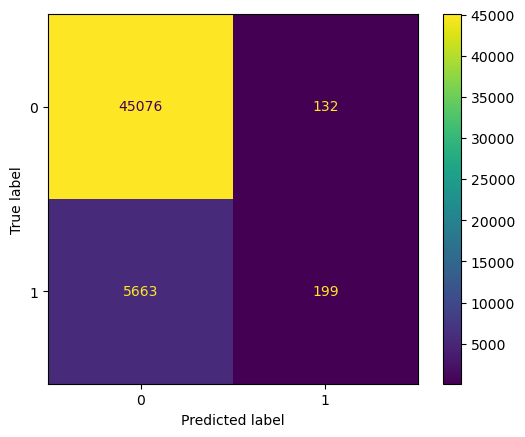

In [208]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test, yhat_lr1)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

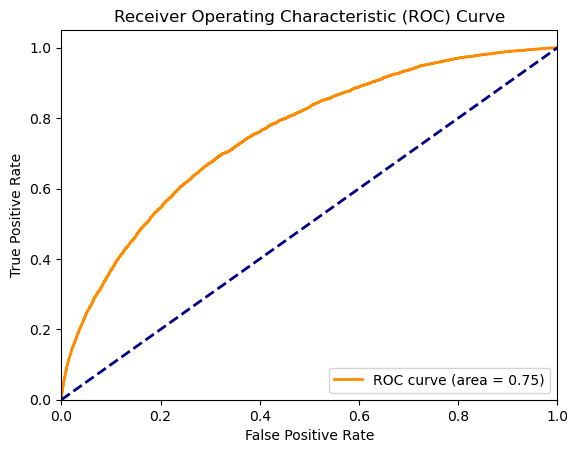

In [209]:
# Predict probabilities on the test set
ylog_probs1 = log_reg1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ylog_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [210]:
# XG BOOST CLASSIFIER
xgb1 = XGBClassifier()
# Fitting the model with the training Data
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [211]:
# Making Predictions
yhat_xgb1 = xgb1.predict(X_test)

In [212]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, xgb1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_xgb1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, yhat_xgb1, average='weighted')))

Train set Accuracy:  0.8934045438301914
Test set Accuracy:  0.8858037987076561
F1 Score: 0.8469


In [213]:
# Classification Report
print(classification_report(y_test, yhat_xgb1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45208
           1       0.52      0.08      0.14      5862

    accuracy                           0.89     51070
   macro avg       0.70      0.53      0.54     51070
weighted avg       0.85      0.89      0.85     51070



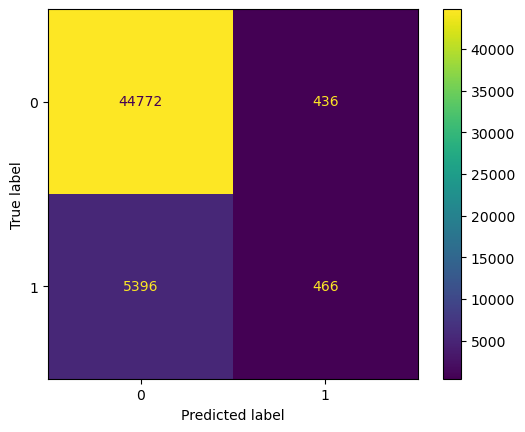

In [214]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test, yhat_xgb1)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

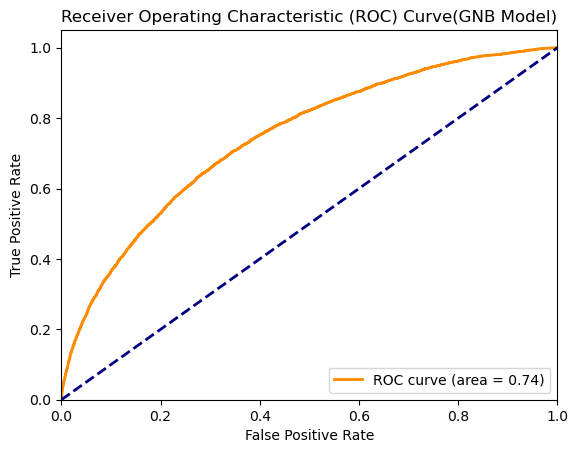

In [215]:
# Predict probabilities on the test set
yxgb_probs1 = xgb1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yxgb_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [216]:
# Gaussian Naive Bayes
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
gnb_yhat1 = gnb1.predict(X_test)

In [217]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, gnb1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, gnb_yhat1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, gnb_yhat1, average='weighted')))

Train set Accuracy:  0.8846321416507977
Test set Accuracy:  0.8863716467593499
F1 Score: 0.8379


In [218]:
# Classification Report
print(classification_report(y_test, gnb_yhat1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.61      0.03      0.05      5862

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



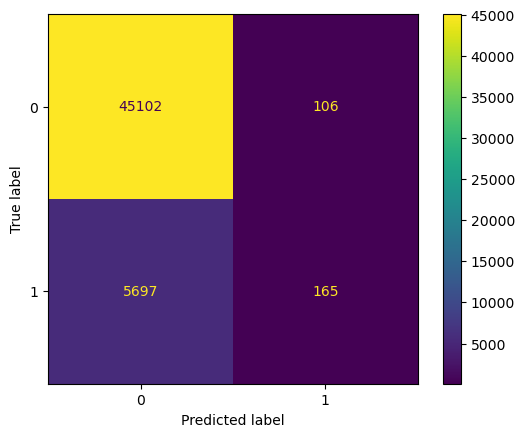

In [219]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test, gnb_yhat1)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

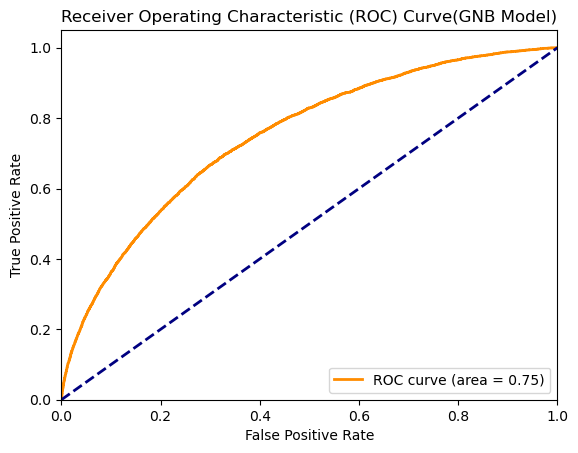

In [220]:
# Predict probabilities on the test set
ygnb_probs1 = gnb1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ygnb_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [221]:
#Decision Tree
loanTree1 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Training our model
loanTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [222]:
# Prediction
yhat_tree1 = loanTree1.predict(X_test)

In [223]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, loanTree1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_tree1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, yhat_tree1, average='weighted')))

Train set Accuracy:  0.8835355913783735
Test set Accuracy:  0.8852163696886626
F1 Score: 0.8313


In [224]:
# Classification Report
print(classification_report(y_test, yhat_tree1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.00      0.00      0.00      5862

    accuracy                           0.89     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.89      0.83     51070



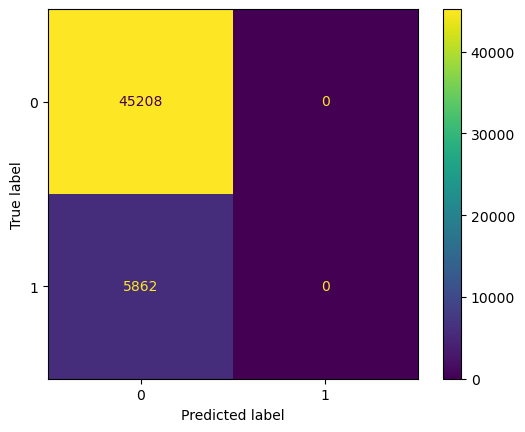

In [225]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test, yhat_tree1)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

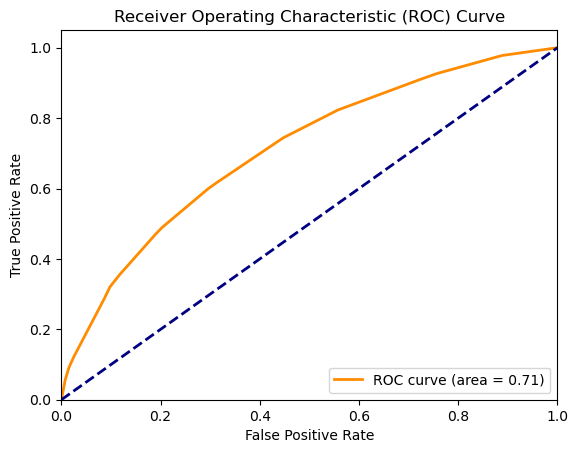

In [226]:
# Predict probabilities on the test set
ytree_probs1 = loanTree1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ytree_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

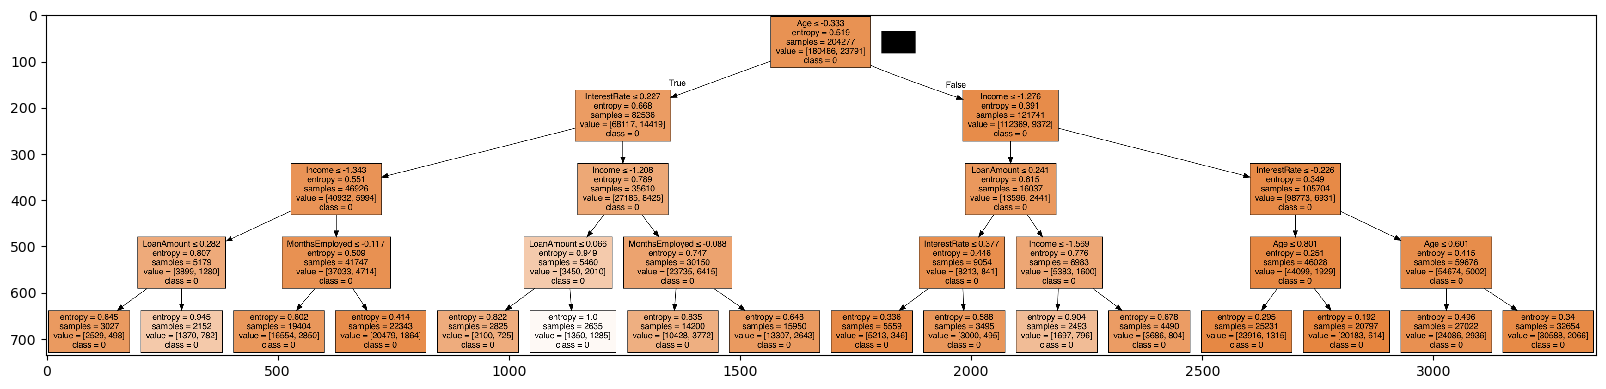

In [227]:
#Decision Tree
dot_data = StringIO()
# Define feature names as a list
featureNames = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
                'HasMortgage', 'HasDependents', 'HasCoSigner', "Education_Bachelor's", 'Education_High School', "Education_Master's",
                'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
                'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home']

# Export Decision Tree to Graphviz format
out = tree.export_graphviz(loanTree1, feature_names=featureNames, out_file=dot_data, class_names=[
                           '0', '1'], filled=True, special_characters=True, rotate=False)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write graph to a PNG file
filename = "LoanTree.png"
graph.write_png(filename)

# Display the PNG image using Matplotlib
img = mpimg.imread(filename)
plt.figure(figsize=(20, 30))
plt.imshow(img, interpolation='nearest')
plt.show()

In [228]:
#Comapring results
model_names = ['Logistic Regression', 'Xg Boost',
              'Gaussian Naive Bayes', 'Decision Trees']
test_accuracy = [0.8865, 0.8858, 0.8863, 0.8852]
f1_scores = [0.8391, 0.8469, 0.8379, 0.8313]
auc_roc_scores = [0.75, 0.74, 0.75, 0.71]
compare_df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": test_accuracy,
    "F1-Score": f1_scores,
    "AUC-ROC": auc_roc_scores
})
compare_df.head()

,Model,Test Accuracy,F1-Score,AUC-ROC
0,Logistic Regression,0.8865,0.8391,0.75
1,Xg Boost,0.8858,0.8469,0.74
2,Gaussian Naive Bayes,0.8863,0.8379,0.75
3,Decision Trees,0.8852,0.8313,0.71


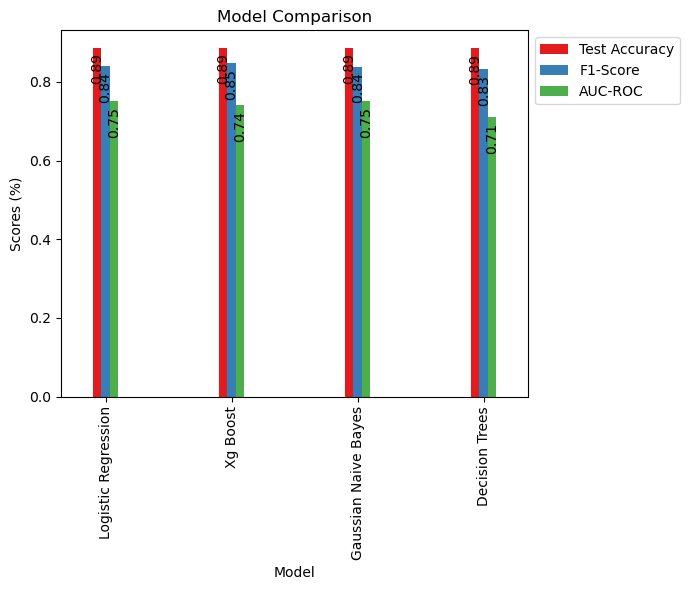

In [229]:
ax = compare_df.plot(x="Model", kind="bar", figsize=(7, 6), width=0.2)
ax.set_ylabel("Scores (%)")
ax.set_title("Model Comparison")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -15), textcoords='offset points', rotation=90)
plt.tight_layout()
plt.show()

In [230]:
#Improve the Model
#We motice that the classes are not balanced. We balance the classes using Smote
# Apply SMOTE to generate synthetic samples for the minority class
X_2 = loan_df_encoded.drop('Default', axis =1)
X_2.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home
0,56,85994,50587,520,80,4,15,36,0,1,...,0,0,0,1,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4,60,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46,84208,129188,451,26,3,21,24,0,1,...,0,0,1,1,0,0,1,0,0,0
3,32,31713,44799,743,0,3,7,24,0,0,...,0,0,0,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6,48,0,0,...,0,0,1,1,0,0,1,0,0,0


In [231]:
y_2 = loan_df_encoded.Default
y_2.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [232]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_2, y_2)

In [233]:
X_resampled.shape

(451388, 25)

In [234]:
y_resampled.shape

(451388,)

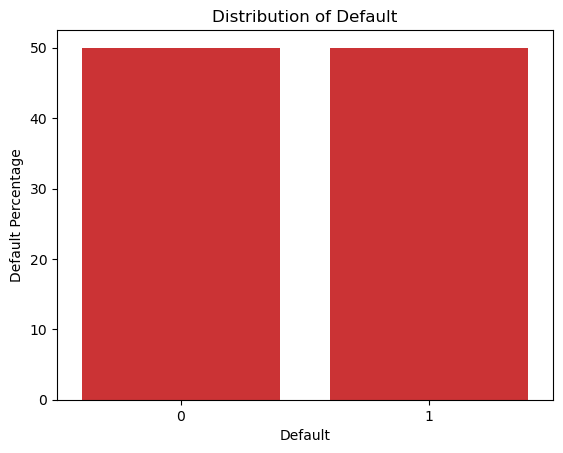

In [235]:
sns.barplot(y_resampled.value_counts() /
            y_resampled.count()*100)
plt.title('Distribution of Default')
plt.ylabel('Default Percentage')
plt.show()

In [236]:
#The classes are balanced and split 50/50

In [237]:
#Feature Selection
#Implement Mutual Information
#We use MI Scores to see relationship between features and Target
# Calculate Mutual Information for classification
mi_scores = mutual_info_classif(X_resampled, y_resampled)

# Print MI scores for each feature
for feature_name, score in zip(X_resampled.columns, mi_scores):
    print(f"{feature_name}: {score}")

Age: 0.05864384502808817
Income: 0.018588716591704912
LoanAmount: 0.013513340542897545
CreditScore: 0.01780033864768593
MonthsEmployed: 0.029224448979838336
NumCreditLines: 0.029446135929707573
InterestRate: 0.04006893457686744
LoanTerm: 0.30168599443944677
DTIRatio: 0.0
HasMortgage: 0.057273502083962535
HasDependents: 0.06297978927941394
HasCoSigner: 0.06448061619753642
Education_Bachelor's: 0.026893853334356344
Education_High School: 0.023390794985380214
Education_Master's: 0.03362763192689311
EmploymentType_Part-time: 0.028953181693861962
EmploymentType_Self-employed: 0.03200483470801707
EmploymentType_Unemployed: 0.020452873725812504
MaritalStatus_Divorced: 0.029925097727001804
MaritalStatus_Married: 0.046533054197104295
MaritalStatus_Single: 0.033441239674018464
LoanPurpose_Auto: 0.023272565113118482
LoanPurpose_Business: 0.021747694816231622
LoanPurpose_Education: 0.025215337603604837
LoanPurpose_Home: 0.03145823032013895


In [238]:
# Select features with MI score > 0.01
selected_features = X_resampled.columns[mi_scores >= 0.02]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'HasMortgage', 'HasDependents', 'HasCoSigner', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home'],
      dtype='object')


In [239]:
#Select only features with MI score >= 0.02 and we also included Income since we know this from domain knowledge
X_resampled = X_resampled[['Age', 'Income','MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'HasMortgage', 'HasDependents', 'HasCoSigner', "Education_Bachelor's",
       'Education_High School', "Education_Master's",
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home']]
X_resampled.shape

(451388, 22)

In [240]:
# normalize data
X_resampled = StandardScaler().fit(X_resampled).transform(X_resampled)
X_resampled[0:1]

array([[ 1.12219597,  0.20244791,  0.76750611,  1.55297339,  0.19111525,
         0.00730422,  1.28299912,  1.30323834,  1.3065869 ,  2.19567333,
        -0.46053827, -0.44405569, -0.45382694, -0.44738003, -0.4655692 ,
         1.75714219, -0.54248629, -0.56189647, -0.38736378, -0.39276575,
        -0.38805184, -0.38250798]])

In [241]:
# Train Test Split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=14)
print('Train set:', X_train_resampled.shape,  y_train_resampled.shape)
print('Test set:', X_test_resampled.shape,  y_test_resampled.shape)

Train set: (270832, 22) (270832,)
Test set: (180556, 22) (180556,)


In [242]:
#Model building

In [243]:
#Logistics Regression
log_reg2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_resampled, y_train_resampled)
log_reg2

LogisticRegression(C=0.01, solver='liblinear')

In [244]:
yhat_lr2 = log_reg2.predict(X_test_resampled)

In [245]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, log_reg2.predict(X_train_resampled)))
print("Test set Accuracy: ",accuracy_score(y_test_resampled, yhat_lr2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_lr2, average='weighted')))

Train set Accuracy:  0.8889754534176169
Test set Accuracy:  0.8913467289926671
F1 Score: 0.8912


In [246]:
# Classification Report
print(classification_report(y_test_resampled, yhat_lr2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     90481
           1       0.92      0.85      0.89     90075

    accuracy                           0.89    180556
   macro avg       0.89      0.89      0.89    180556
weighted avg       0.89      0.89      0.89    180556



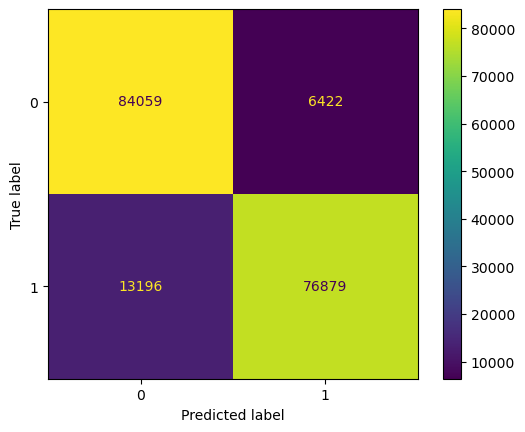

In [247]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_lr2)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

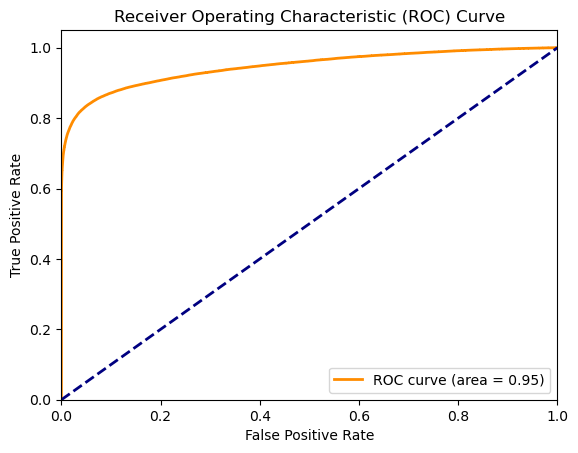

In [248]:
# Predict probabilities on the test set
ylog_probs2 = log_reg2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ylog_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [249]:
# XG BOOST
xgb2 = XGBClassifier()
# Fitting the model with the training Data
xgb2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [250]:
# Making Predictions
yhat_xgb2 = xgb2.predict(X_test_resampled)

In [251]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, xgb2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, yhat_xgb2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_xgb2, average='weighted')))

Train set Accuracy:  0.9229190051397176
Test set Accuracy:  0.9181971244378475
F1 Score: 0.9179


In [252]:
# Classification Report
print(classification_report(y_test_resampled, yhat_xgb2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     90481
           1       0.97      0.86      0.91     90075

    accuracy                           0.92    180556
   macro avg       0.92      0.92      0.92    180556
weighted avg       0.92      0.92      0.92    180556



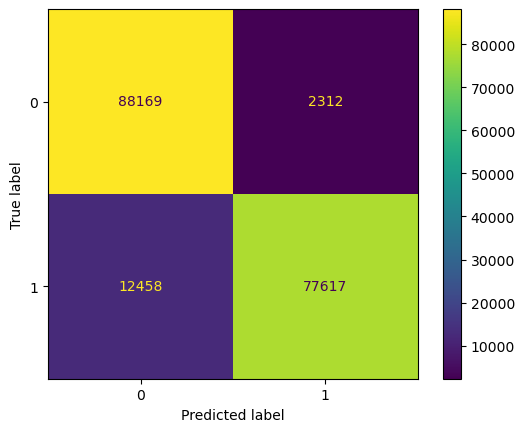

In [253]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_xgb2)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

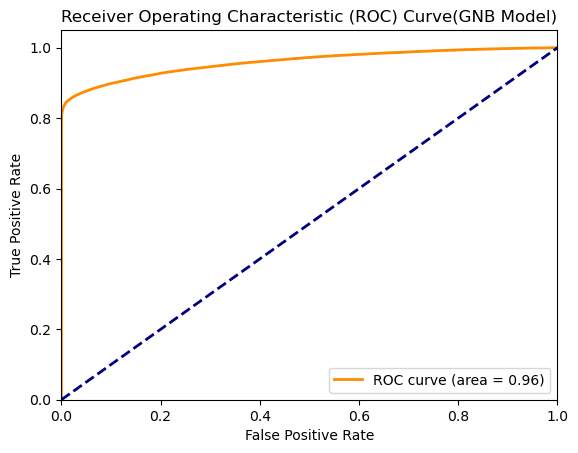

In [254]:
# Predict probabilities on the test set
yxgb_probs2 = xgb2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, yxgb_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [255]:
# Gaussian Naive Bayes
gnb2 = GaussianNB()
gnb2.fit(X_train_resampled, y_train_resampled)
gnb_yhat2 = gnb2.predict(X_test_resampled)

In [256]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, gnb2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, gnb_yhat2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, gnb_yhat2, average='weighted')))

Train set Accuracy:  0.8729322975128493
Test set Accuracy:  0.8751578457653028
F1 Score: 0.8745


In [257]:
# Classification Report
print(classification_report(y_test_resampled, gnb_yhat2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     90481
           1       0.94      0.81      0.87     90075

    accuracy                           0.88    180556
   macro avg       0.88      0.88      0.87    180556
weighted avg       0.88      0.88      0.87    180556



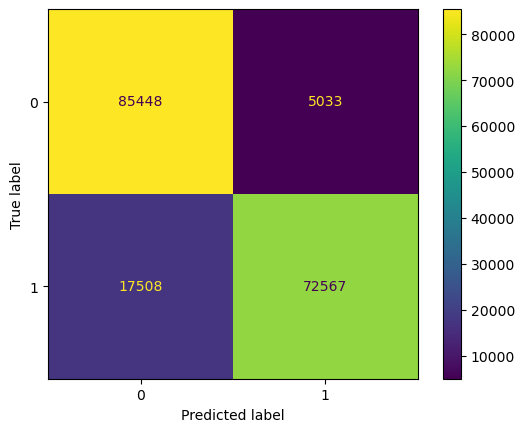

In [258]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test_resampled, gnb_yhat2)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

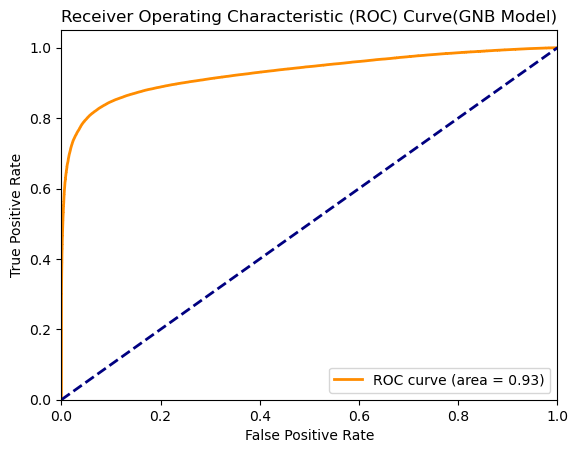

In [259]:
# Predict probabilities on the test set
ygnb_probs2 = gnb2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ygnb_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [260]:
#Decision Tree
loanTree2 = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Training our model
loanTree2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [261]:
# Prediction
yhat_tree2 = loanTree2.predict(X_test_resampled)

In [262]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, loanTree2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, yhat_tree2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_tree2, average='weighted')))

Train set Accuracy:  0.9650447509895433
Test set Accuracy:  0.8515917499280001
F1 Score: 0.8516


In [263]:
# Classification Report
print(classification_report(y_test, yhat_tree1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.00      0.00      0.00      5862

    accuracy                           0.89     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.89      0.83     51070



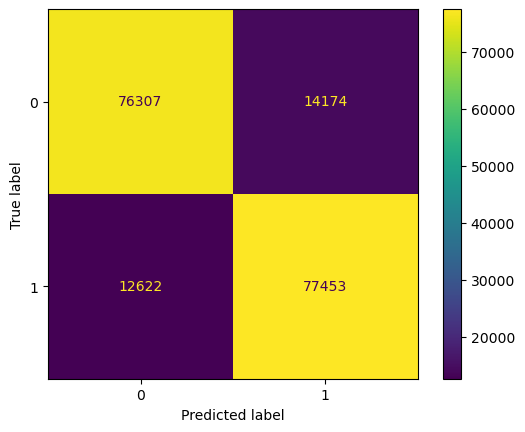

In [264]:
# Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_tree2)
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

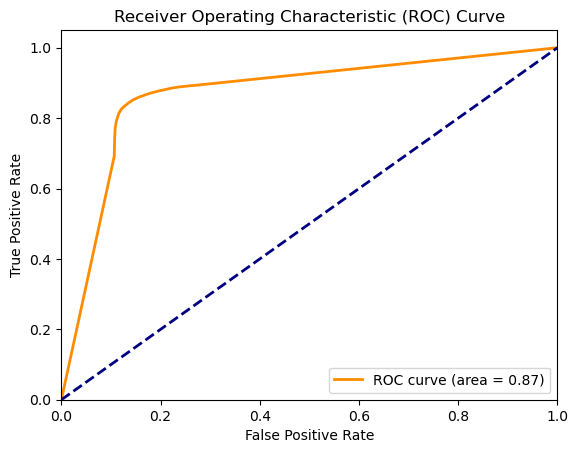

In [265]:
# Predict probabilities on the test set
ytree_probs2 = loanTree2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ytree_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [273]:
#Comapring all model results
model_names = ['Logistic Regression Model 1', 'Xg Boost Model 1',
               'Gaussian Naive Bayes Model 1', 'Decision Trees Model 1', 'Logistic Regression Model 2', 'Xg Boost Model 2',
               'Gaussian Naive Bayes Model 2', 'Decision Trees Model 2']
test_accuracy = [0.8865, 0.8858, 0.8863,
                 0.8852, 0.8913, 0.9181, 0.8751, 0.8515]
f1_scores = [0.8391, 0.8469, 0.8379, 0.8313, 0.8912, 0.9179, 0.8745, 0.8516]
auc_roc_scores = [0.75, 0.74, 0.75, 0.71, 0.95, 0.96, 0.93, 0.87]
compare_df = pd.DataFrame({
    "Models": model_names,
    "Test Accuracy": test_accuracy,
    "F1-Score": f1_scores,
    "AUC-ROC": auc_roc_scores
})
compare_df.head()

,Models,Test Accuracy,F1-Score,AUC-ROC
0,Logistic Regression Model 1,0.8865,0.8391,0.75
1,Xg Boost Model 1,0.8858,0.8469,0.74
2,Gaussian Naive Bayes Model 1,0.8863,0.8379,0.75
3,Decision Trees Model 1,0.8852,0.8313,0.71
4,Logistic Regression Model 2,0.8913,0.8912,0.95


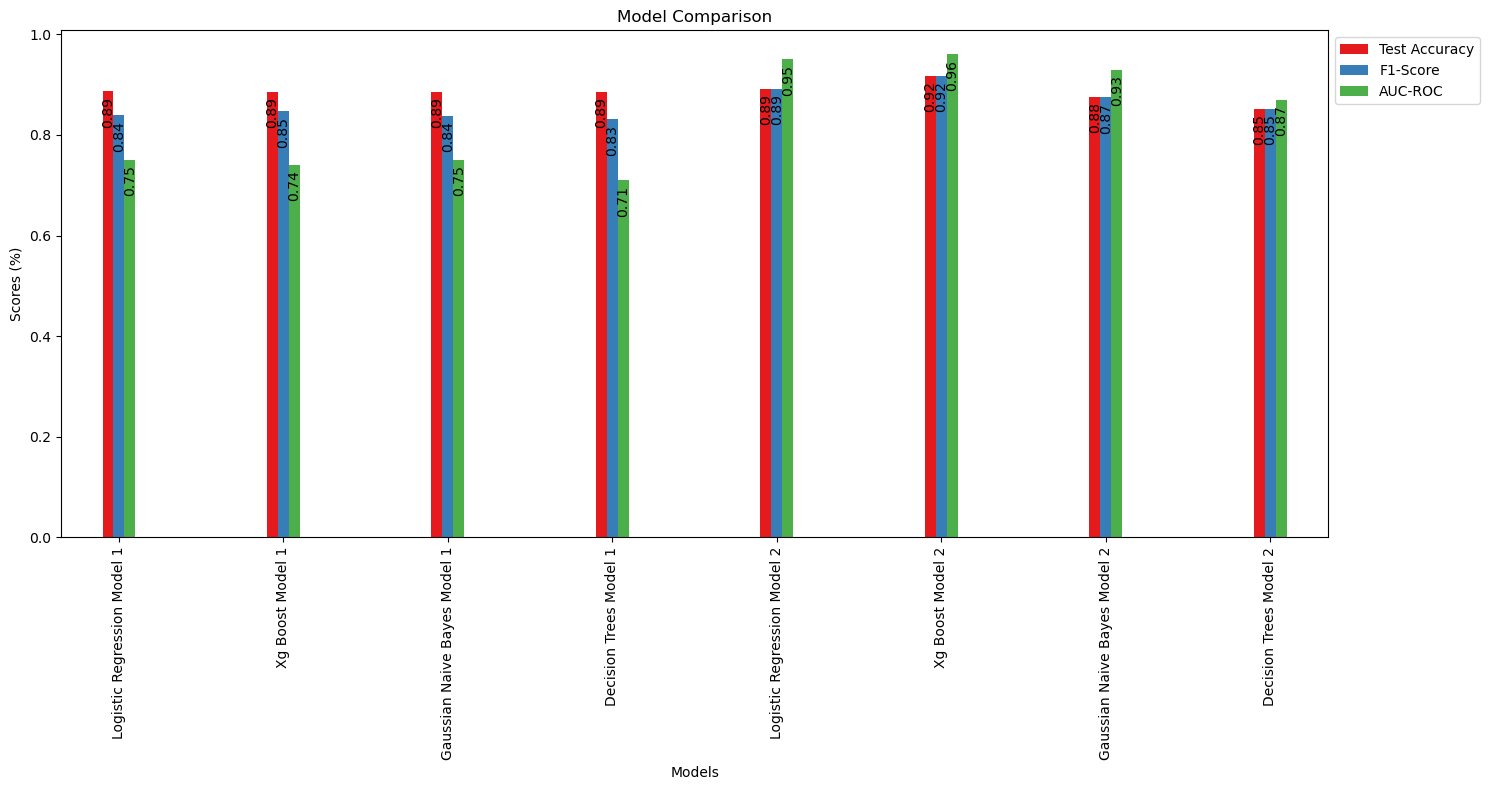

In [275]:
ax = compare_df.plot(x="Models", kind="bar", figsize=(15, 8), width=0.2)
ax.set_ylabel("Scores (%)")
ax.set_title("Model Comparison")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -15), textcoords='offset points', rotation=90)
plt.tight_layout()
plt.show()